# Communicate Data Findings
by Abdulaziz Alamri

## Contents:
1. Investigation Overview
2. Dataset Overview
3. Distribution Borrower APR
4. Distribution Loan Amount
5. APR vs Loan Amount
6. APR vs Prosper Rating
7. Effect on Relationship between APR and Loan Amount
8. APR by Rating and Term

## Investigation Overview

In this investigation, I wanted to look at the characteristics of loans that could be used to predict their borrower APR. The main focus was on the original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income.  



## Dataset Overview

The dataset consisted of borrower APRs and attributes of 113,937 loans. The attributes included original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income, as well as many other features such as borrower's employment status, debt to income ratio, current loan status etc. 352 data points were removed from the analysis due to very large stated monthly income seemed as outliers and missing borrower APR information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
Loan_Data = pd.read_csv('prosperLoanData.csv')

In [3]:
# Subset the dataframe by selecting features of interest
cols = ['LoanOriginalAmount','TotalTrades', 'Occupation','IsBorrowerHomeowner','TotalInquiries','CreditScoreRangeLower','CreditScoreRangeUpper', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)','IncomeRange','DebtToIncomeRatio',   
        'ListingCategory (numeric)','EmploymentStatus']
loan_sub = Loan_Data[cols]

In [4]:
# remove rows where 'DebtToIncomeRatio' is NaN
Remove_index = loan_sub.query('DebtToIncomeRatio == "NaN"').index
loan_sub.drop(index=Remove_index , inplace=True)
# data wrangling, remove loans with stated monthly income greater than 30k, which are outliers
loan_sub = loan_sub[loan_sub.StatedMonthlyIncome<=30000]

In [5]:

# Convert ProsperRating and Employment status into ordered categorical types
rate = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate)
loan_sub['ProsperRating (Alpha)'] = loan_sub['ProsperRating (Alpha)'].astype(ordered_var)

emp = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp)


In [6]:
loan_sub['EmploymentStatus'] = loan_sub['EmploymentStatus'].astype(ordered_var)
loan_sub.shape

(105119, 15)

## Distribution of Borrower APR

The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

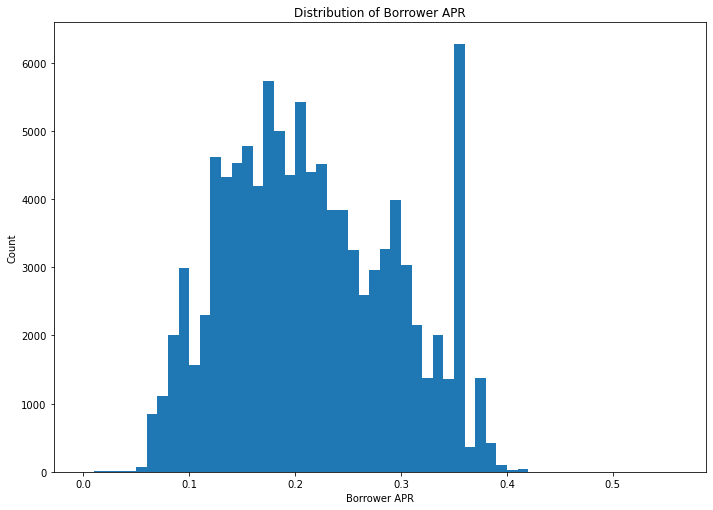

In [7]:
bins = np.arange(0, loan_sub.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[11.69, 8.27])
plt.hist(data = loan_sub, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.ylabel('Count');
plt.title('Distribution of Borrower APR');

## Distribution Loan Amount

The very large spikes in frequency are at 10k, 15k, 20k, 25k and 35k. There are also small spikes at 8k,9k,11k,12k,13k,14k etc. It means that most of the loans are multiples of 1k.

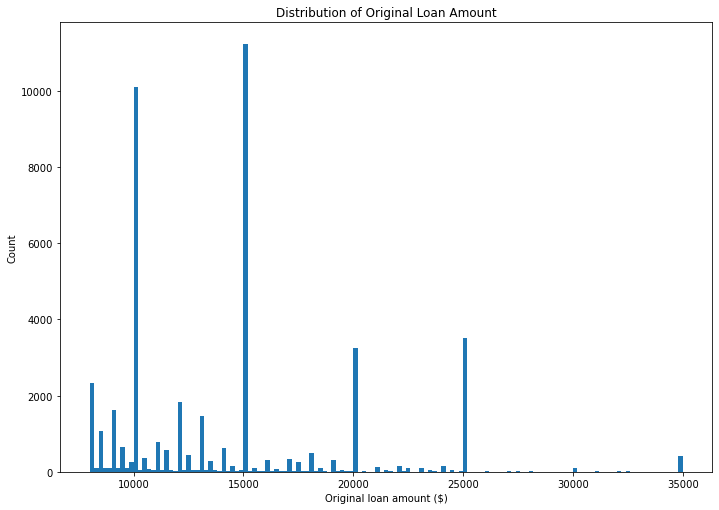

In [8]:
bins = np.arange(8000, loan_sub.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[11.69, 8.27])
plt.hist(data = loan_sub, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)');
plt.ylabel('Count');
plt.title('Distribution of Original Loan Amount');

##  APR vs Loan Amount

At different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. Overall, the borrower APR decrease with increase of loan amount

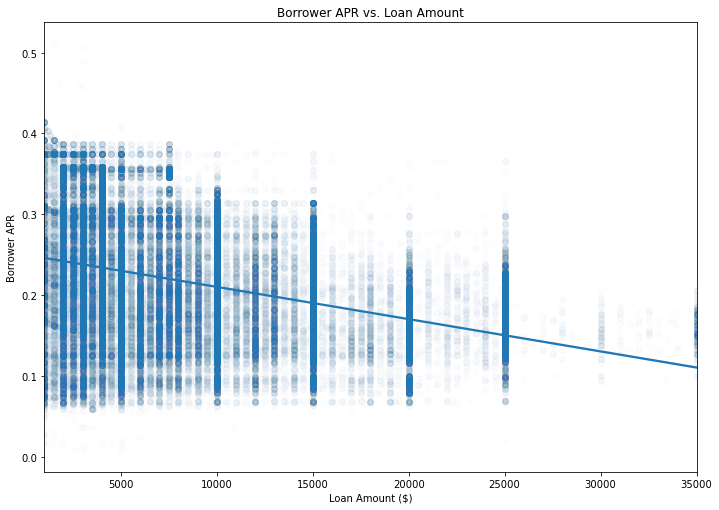

In [9]:
plt.figure(figsize = [11.69, 8.27])
sb.regplot(data = loan_sub, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});
plt.xlabel('Loan Amount ($)')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Loan Amount');

##  APR vs Prosper Rating

The borrower APR decreases with the increasingly better rating. Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR. 

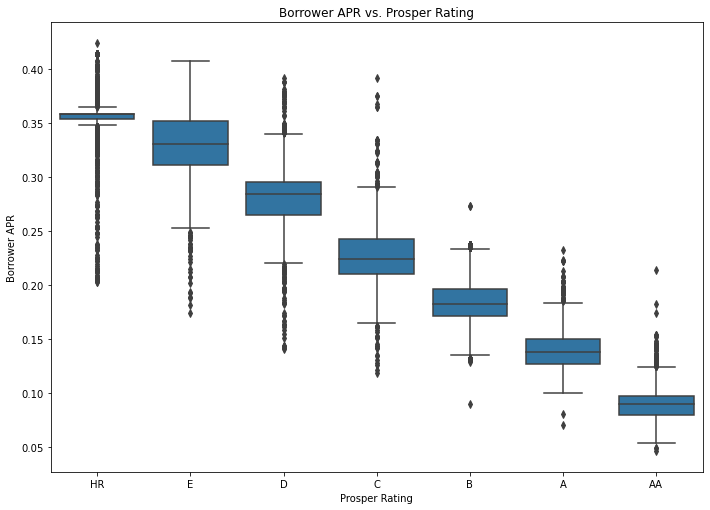

In [10]:
plt.figure(figsize=[11.69, 8.27])
default_color = sb.color_palette()[0]
sb.boxplot(data=loan_sub, x='ProsperRating (Alpha)', y='BorrowerAPR', color=default_color)
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Prosper Rating');

## Effect between APR and Loan Amount

The loan amount increases with better rating. The borrower APR decreases with better rating. Interestingly, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better. This is may because people with A or AA ratings tend to borrow more money, increasting APR could prevent them borrow even more and maximize the profit. But people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

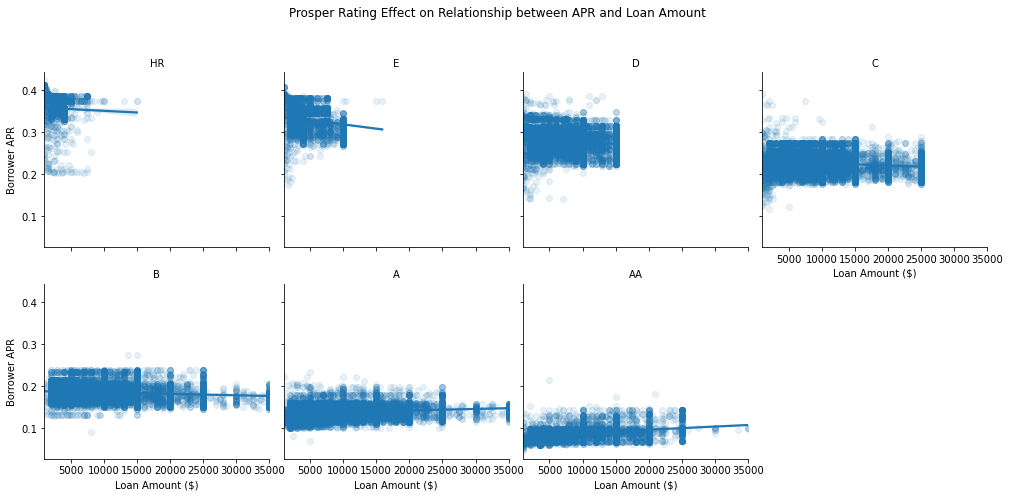

In [11]:
g=sb.FacetGrid(data=loan_sub,col='ProsperRating (Alpha)', height=3.5, col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.set_titles('{col_name}')
g.add_legend();
g.set_xlabels('Loan Amount ($)')
g.set_ylabels('Borrower APR')
plt.suptitle('Prosper Rating Effect on Relationship between APR and Loan Amount');
plt.subplots_adjust(top=0.85)

## APR by Rating and Term

The borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the increase of borrow term.

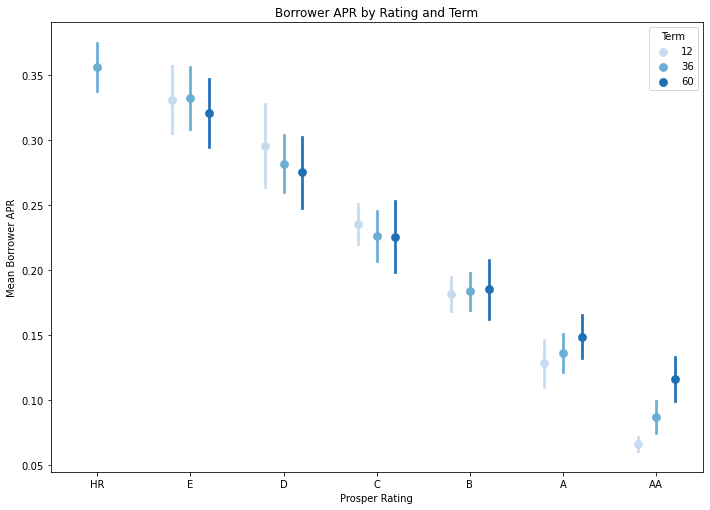

In [12]:
fig = plt.figure(figsize = [11.69, 8.27])
ax = sb.pointplot(data = loan_sub, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')

plt.ylabel('Mean Borrower APR')
plt.xlabel('Prosper Rating')
plt.title('Borrower APR by Rating and Term');



In [13]:
!jupyter nbconvert exploratory_slide.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook exploratory_slide.ipynb to slides
[NbConvertApp] Writing 1039696 bytes to exploratory_slide.slides.html
